In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.signal import convolve2d
from scipy.optimize import curve_fit

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

## 100*100 Correlation Rnd Diagonal Hopping

### no drive
 pgen=0.001, T=0.1,1,10,100 nsim=100, 11-14

 pgen=0.01, T=0.1,1,10,100 nsim=100, 15-18

pgen=0.001, pdr=0.5, T= 1 ... 100 nsim=100, 21-24

pgen=0.01, pdr=0.5, T= 1 ... 100 nsim=100, 25-28

In [285]:
file_name = "../data/241030/241030_28_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

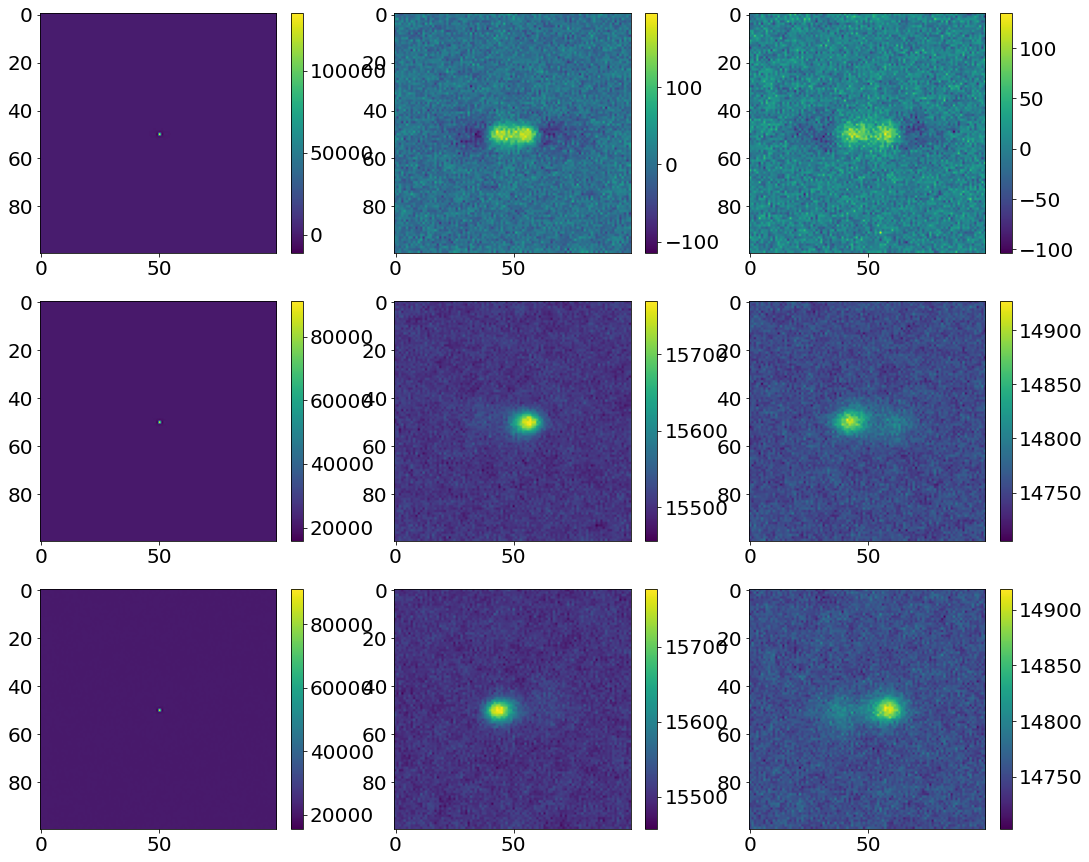

In [286]:
t1 = 0
t2 = 15
t3 = 30

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

In [14]:
def gaussian_2d(coor, x0, y0, sigma_x, sigma_y, amplitude, offset):
    """2D Gaussian function."""
    x = coor[0]
    y = coor[1]
    return offset + amplitude * np.exp(
        -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    )

params_l = []
# for t in range(int(scoor.shape[-1]/2)):
for t in range(200):
    scoor_t = np.roll(scoor[:,:,t],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
    # Get the coordinates of the pixels
    x = np.arange(0, scoor_t.shape[1])
    y = np.arange(0, scoor_t.shape[0])
    x, y = np.meshgrid(x, y)

    # Flatten the arrays for fitting
    x = x.ravel()
    y = y.ravel()
    z = scoor_t.ravel()

    # Initial guess for the parameters
    initial_guess = (scoor_t.shape[1] / 2, scoor_t.shape[0] / 2, 1, 1, np.max(scoor_t), np.min(scoor_t))
    
    # Fit the data
    params, _ = curve_fit(gaussian_2d, (x, y), z, p0=initial_guess)

    # Extract the parameters
    x0, y0, sigma_x, sigma_y, amplitude, offset = params
    params_l.append(params)

params_l = np.array(params_l)
params_l.shape

/usr/local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(200, 6)

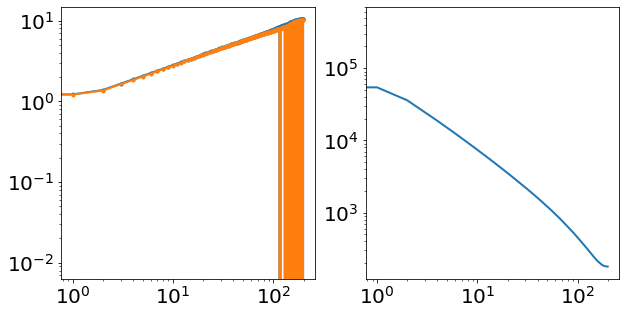

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot((params_l[:,2]+params_l[:,3])/2,'.-')
plt.plot(params_l[:,3],'.-')
# plt.ylim(1e0,1e1)
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.plot(params_l[:,4])
plt.xscale('log')
plt.yscale('log')

In [16]:
slope_start = 10
slope_end = 100

tfit_l = np.arange(slope_start,slope_end,dtype=int)
m, b = np.polyfit(np.log(tfit_l), np.log((params_l[slope_start:slope_end,2]+params_l[slope_start:slope_end,3])/2), 1)
print("var exponents", m)
m, b = np.polyfit(np.log(tfit_l), np.log(params_l[slope_start:slope_end,4]), 1)
print("var exponents", m)

var exponents 0.43324880929004045
var exponents -1.231351315866425


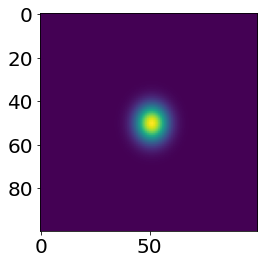

In [42]:
fitted_gaussian = gaussian_2d((x, y), *params).reshape(scoor_t.shape)
plt.imshow(fitted_gaussian)


### Drive
pgen=0.01, pdr=0.5, T= 1...100 nsim=1000, 41-44

In [298]:
file_name = "../data/241030/241030_43_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

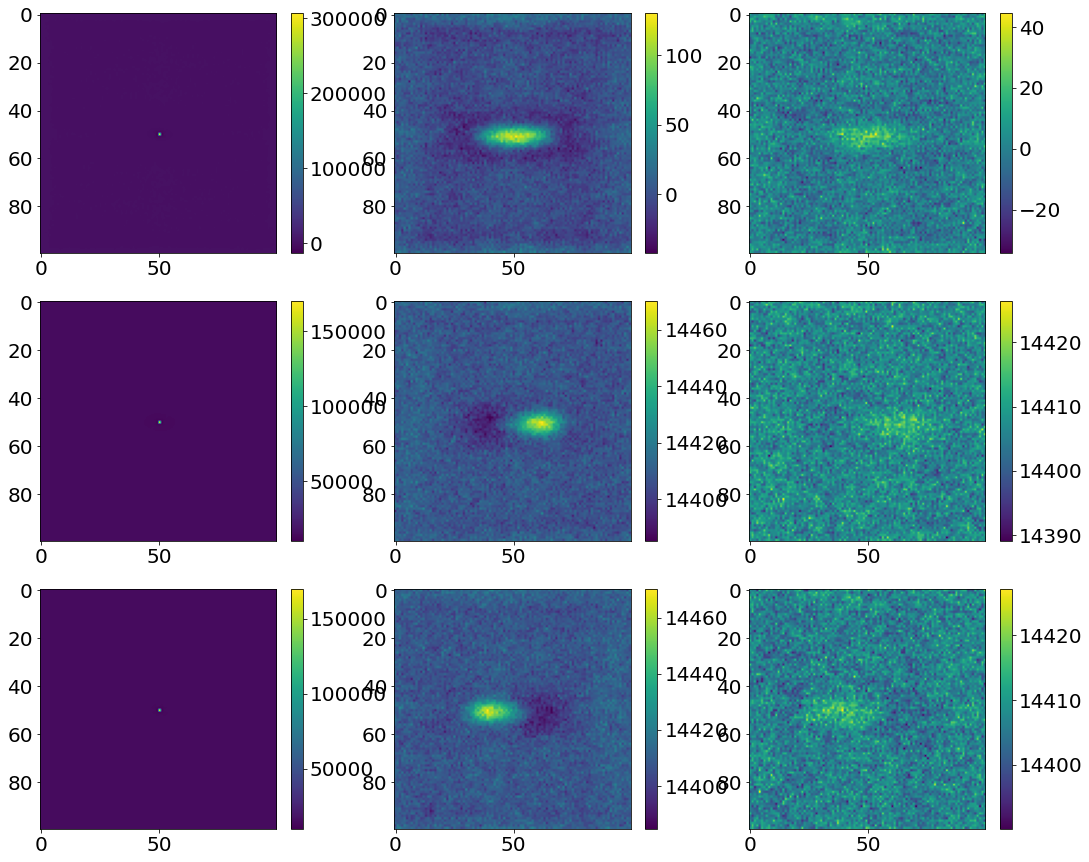

In [299]:
t1 = 0
t2 = 30
t3 = 50

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

## Current
100 * 100 * 200, pgen=0.001, T=10 nsim=100, 31

50 * 50 * 200, pgen=0.001, T=10 nsim=100, 32

In [255]:
file_name = "../data/241030/241030_34_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'current_data.csv',skiprows=1,delimiter=',')
current = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

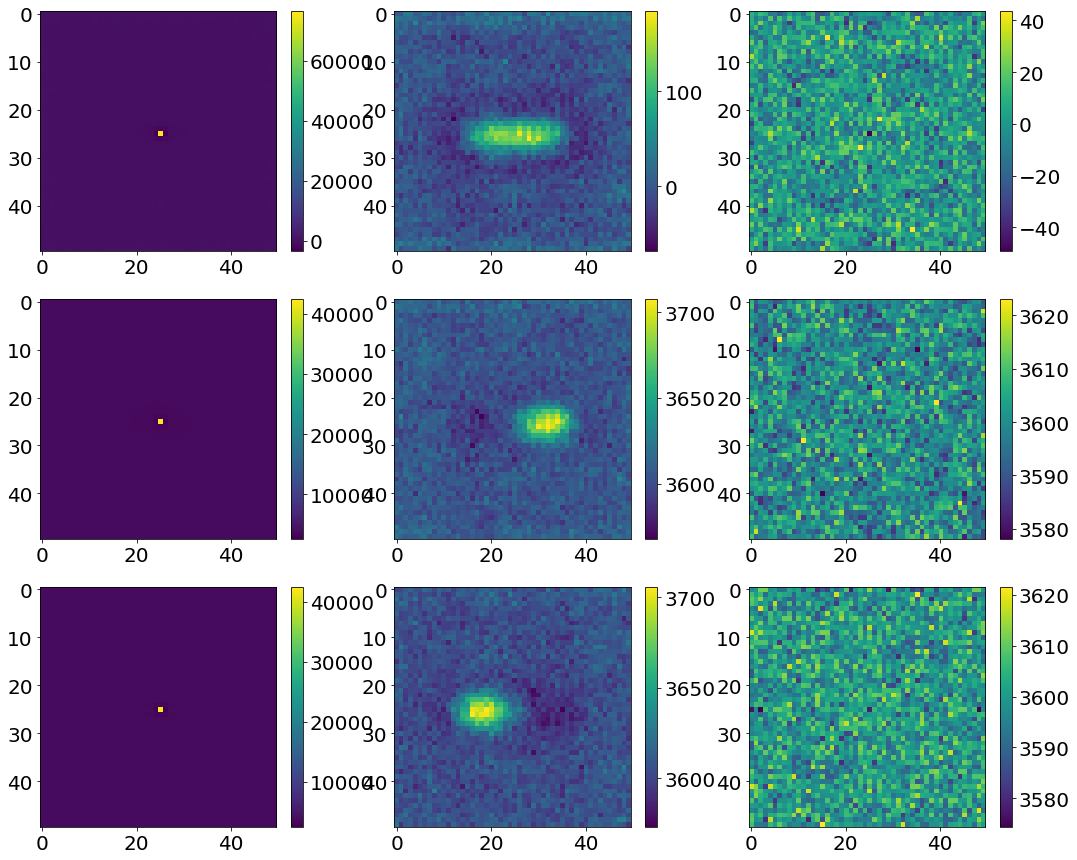

In [249]:
t1 = 0
t2 = 15
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1))
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

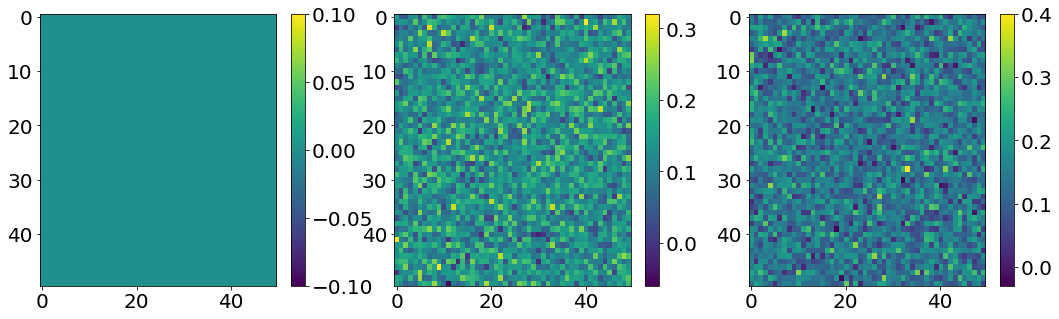

In [250]:
t1 = 0
t2 = 15
t3 = 30

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.imshow(current[:,:,t1],aspect='auto')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(current[:,:,t2],aspect='auto')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(current[:,:,t3],aspect='auto')
plt.colorbar()

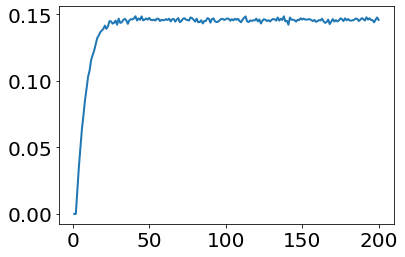

In [256]:
plt.plot(t_l,np.average(current[:,:,:],axis=(0,1)))